Saving telecom_customer_churn.csv to telecom_customer_churn.csv
🔍 Data Overview:
Shape: (7043, 38)
  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                 

<ipython-input-1-f7449db3ed35>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


✅ Model Evaluation:
Accuracy Score: 0.8459900638750887

Confusion Matrix:
 [[956  89]
 [128 236]]

Detailed Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      1045
           1       0.73      0.65      0.69       364

    accuracy                           0.85      1409
   macro avg       0.80      0.78      0.79      1409
weighted avg       0.84      0.85      0.84      1409



<ipython-input-1-f7449db3ed35>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-1-f7449db3ed35>:79: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


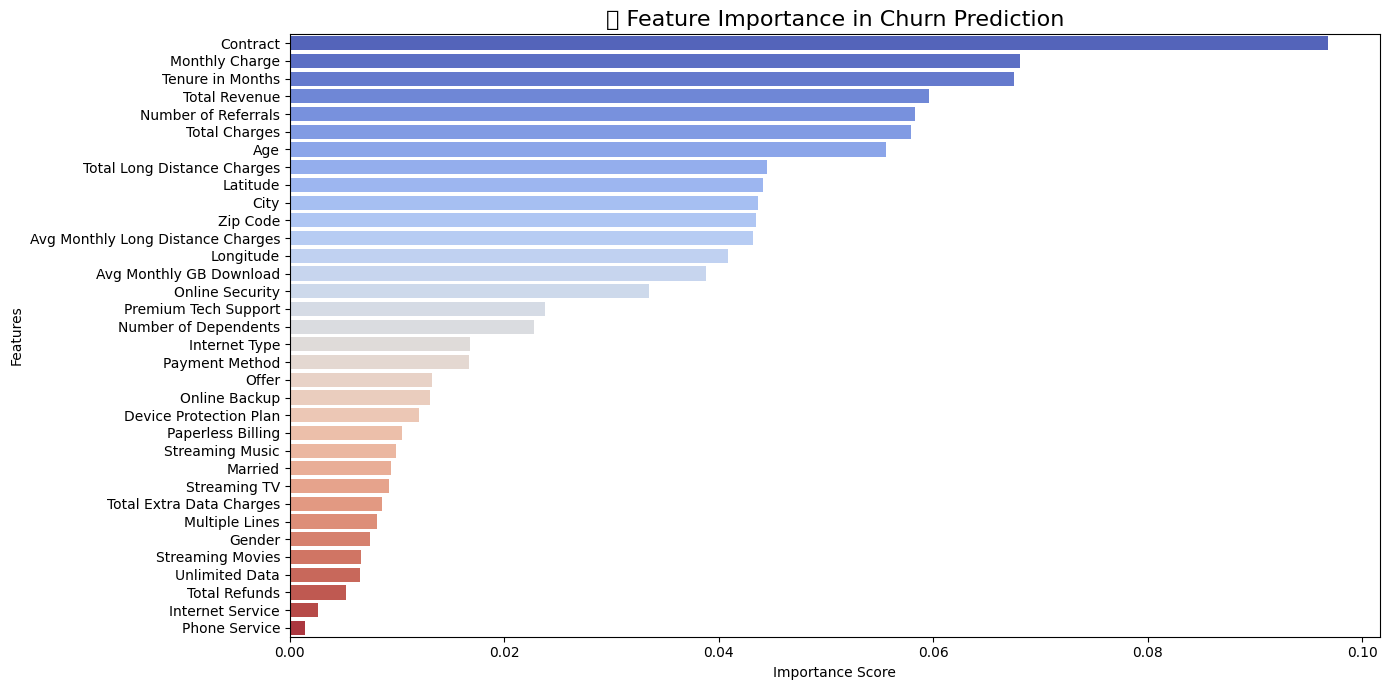

In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

# 2. Upload CSV File
uploaded = files.upload()

# 3. Read Dataset
df = pd.read_csv('/content/telecom_customer_churn.csv')  # <-- change filename to your uploaded file

# 4. Basic Info
print("🔍 Data Overview:")
print("Shape:", df.shape)
print(df.head())
print(df.info())

# 5. Handle Missing & Unwanted Columns
if 'Customer ID' in df.columns:
    df.drop('Customer ID', axis=1, inplace=True)

# Convert charges to numeric if applicable
if 'Total Charges' in df.columns:
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
    df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

# 6. Create Target Variable from 'Customer Status'
df['Churn'] = df['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)

# 7. Encode Categorical Columns
categorical = df.select_dtypes(include='object').columns
encoder = LabelEncoder()
for feature in categorical:
    df[feature] = encoder.fit_transform(df[feature])

# 8. Prepare Features and Scale
X_features = df.drop(['Churn', 'Customer Status', 'Churn Category', 'Churn Reason'], axis=1)
y_target = df['Churn']

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X_features)

# 9. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_target, test_size=0.2, random_state=0)

# 10. Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=150, random_state=0)
rf_model.fit(X_train, y_train)

# 11. Predictions and Evaluation
predictions = rf_model.predict(X_test)

print("✅ Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nDetailed Report:\n", classification_report(y_test, predictions))

# 12. Visualize Feature Importances
importance_vals = rf_model.feature_importances_
sorted_idx = np.argsort(importance_vals)[::-1]
feature_names = X_features.columns

# Create a colorful bar plot
plt.figure(figsize=(14, 7))
sns.barplot(
    x=importance_vals[sorted_idx],
    y=feature_names[sorted_idx],
    palette=sns.color_palette("coolwarm", len(feature_names))
)
plt.title("🎯 Feature Importance in Churn Prediction", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
